# Dualplot libraty

Create a `matplotlib` figure with dual y-axis using the style by:

https://www.r-bloggers.com/dual-axes-time-series-plots-may-be-ok-sometimes-after-all/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+RBloggers+%28R+bloggers%29

## Installation

Commit from `github`

```
# pip install .
```

## Usage

Import the module `dualplot` and additional modules required. The module contains the ``DualPlot`` class, which allows to create ``matplotlib`` graphs with two axes.

In [48]:
import dualplot
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.alpha'] = 0.5

The excell file containing the data to plot is loaded using ``pandas``:

In [12]:
change = pd.read_excel('http://www.rbnz.govt.nz/-/media/ReserveBank/Files/Statistics/Key%20graphs/graphdata.xlsx', sheetname="8_NZDUSD", skiprows=4,
                      parse_cols=[1, 2, 3])

The column ``DATE`` is converted from ``1984M1`` to date format:

In [16]:
change['DATE'] = pd.to_datetime(change['DATE'], format='%YM%m')

In [17]:
change.head()

,DATE,R$USD,RTWI
0,1984-01-01,0.6489,74.74
1,1984-02-01,0.6582,74.79
2,1984-03-01,0.6682,74.71
3,1984-04-01,0.6600,74.56
4,1984-05-01,0.6496,74.61


Finally the ``DualPlot`` class is used to plot change rate from New Zealand dollars to US dollars and the trade-weighted index:

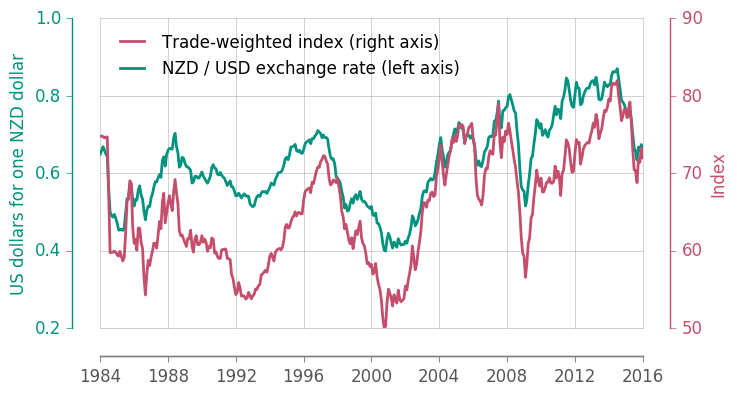

In [47]:
# create the dual plot object
dp = dualplot.DualPlot(figsize=(7, 4))
# plot data on the left axis
dp.plot_left(change['DATE'], change['R$USD'], 
             label="NZD / USD exchange rate (left axis)")
# plot data on the right axis
dp.plot_right(change['DATE'], change['RTWI'], 
              label="Trade-weighted index (right axis)")
# set range of the x axis
dp.axleft.set_xlim(['1984-01-01', '2016-01-01'])
# add legend
dp.legend(frameon=False)
# add labels
dp.set_ylabel_left('US dollars for one NZD dollar')
dp.set_ylabel_right('Index')
# set the number of major ticks
dp.axleft.locator_params(axis='y', nbins=4)
dp.axright.locator_params(axis='y', nbins=4)